In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset into pandas
iris = load_iris(as_frame=True)
df = iris.frame

# Show the first 5 rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 1) Check the structure of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# 3) Summary statistics (mean, std, min, max, etc.)
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# 4) Add a readable species column (0->setosa, 1->versicolor, 2->virginica)
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# show first 5 rows to confirm
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data exploration
This notebook loads the Iris dataset and inspects structure, missing values and summary statistics.


In [9]:
# Basic descriptive statistics for numerical columns
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# Average petal length per species
df.groupby("species")["petal length (cm)"].mean()


species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

In [11]:
# Compute average of all numerical columns per species
df.groupby("species").mean(numeric_only=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


### Observations from Descriptive Statistics:
- **Setosa** has the smallest petals on average:
  - Petal length ≈ 1.46 cm  
  - Petal width ≈ 0.25 cm
- **Versicolor** has medium-sized petals:
  - Petal length ≈ 4.26 cm  
  - Petal width ≈ 1.33 cm
- **Virginica** has the largest petals:
  - Petal length ≈ 5.55 cm  
  - Petal width ≈ 2.03 cm
- Sepal lengths and widths vary less distinctly between species, but Setosa tends to have shorter sepals on average.

### Key Insight:
Petal measurements are the most distinctive features to separate the three species, which could be useful for classification or visual comparison in later analysis.

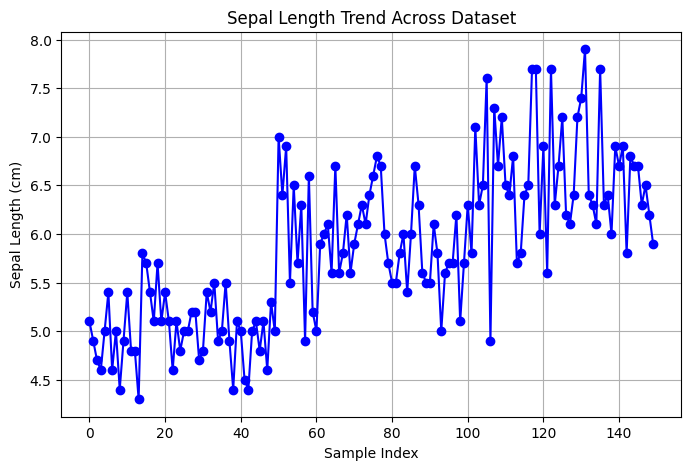

In [12]:
# Line chart of sepal length over dataset index
plt.figure(figsize=(8,5))
plt.plot(df.index, df["sepal length (cm)"], marker='o', linestyle='-', color='blue')
plt.title("Sepal Length Trend Across Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.grid(True)
plt.show()


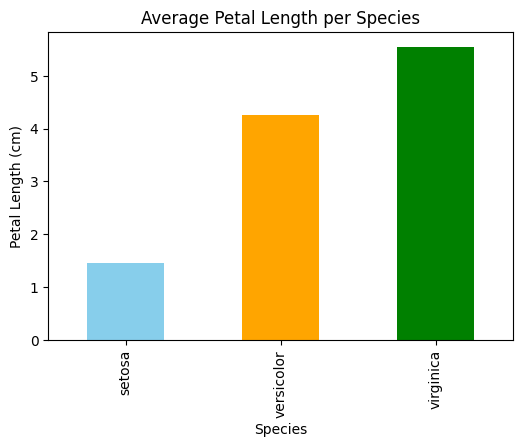

In [13]:
# Bar chart: average petal length per species
plt.figure(figsize=(6,4))
species_avg = df.groupby("species")["petal length (cm)"].mean()
species_avg.plot(kind="bar", color=['skyblue','orange','green'])
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()


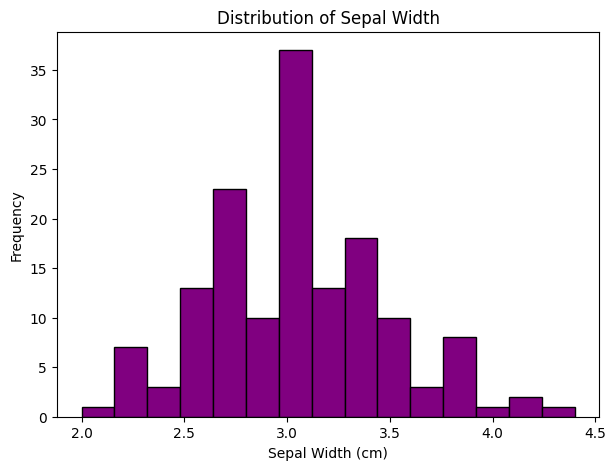

In [14]:
# Histogram of sepal width
plt.figure(figsize=(7,5))
plt.hist(df["sepal width (cm)"], bins=15, color='purple', edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


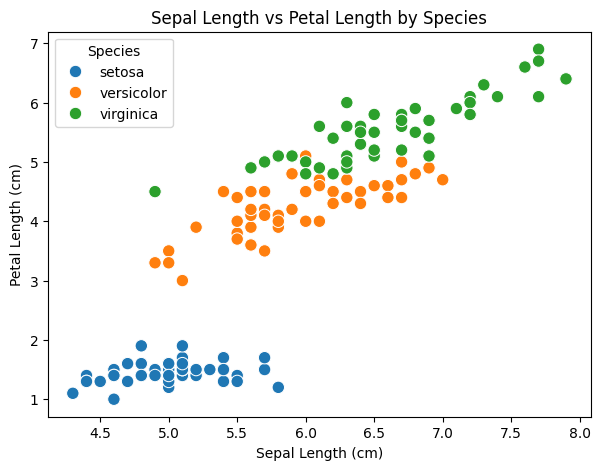

In [15]:
# Scatter plot: sepal length vs petal length
plt.figure(figsize=(7,5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, s=80)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()


## Task 3: Data Visualization - Insights

### Line Chart
- The sepal length shows some variation across samples but no clear trend over the dataset index.
- Individual sample differences can be observed, but grouping by species would give more insight.

### Bar Chart
- Setosa has the smallest average petal length, Versicolor is in the middle, and Virginica has the largest petals.
- Petal length clearly distinguishes the species.

### Histogram
- Sepal width is mostly concentrated around 3 cm, with Setosa showing slightly higher values on average.
- Distribution is roughly normal but shows slight overlap between species.

### Scatter Plot
- Sepal length and petal length together separate the three species well.
- Setosa forms a distinct cluster with small petals and shorter sepals.
- Versicolor and Virginica overlap slightly in sepal length but are separable via petal length.
- Petal length is the strongest feature for distinguishing species visually.


## Conclusions

In this assignment, we successfully loaded and analyzed the Iris dataset using **pandas**, and visualized key insights using **matplotlib** and **seaborn**.

### Key Takeaways:
- **Data Exploration**: The dataset has no missing values and contains clear numerical measurements for sepal and petal dimensions.
- **Basic Analysis**: Petal measurements (length and width) differ significantly between species and are the most distinguishing features.
- **Visualizations**: 
  - Line chart shows variation across samples.  
  - Bar chart highlights the differences in average petal length by species.  
  - Histogram shows the distribution of sepal width.  
  - Scatter plot visually separates species, especially using petal length vs sepal length.

Overall, **petal dimensions are the strongest indicators** for classifying species, which is consistent across both descriptive statistics and visualizations. This notebook demonstrates how **pandas and matplotlib** can be used together for data analysis and visualization.


